# Code version
### * Date Created: 16-03-2021
### * Main Author: Ricardo Luhm
### * Colaborators: Awmnah Asad, Ersegun Kocoglu, Najih Shabir, Ricardo Luhm


In [4]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

import pandas as pd


In [5]:

def generate_single_random(n_size):
    ### Measure the time of a single operation. (Start)
    startt = time()

    ### Randomly generate matrix A, n by n.
    array =np.random.uniform(low=-1.0, high=1.0, size=(n_size,n_size))

    ### Measure the time of a single operation. (End)
    endt = time()
    array_time = endt - startt
    return array, array_time

def generate_x_true(n_size):
    ### Measure the time of a single operation. (Start)
    startt = time()
    ### Randomly generate a vector full of ones
    x_true = np.ones((n_size,1))
    ### Measure the time of a single operation. (End)
    endt = time()
    tt_time = endt - startt
    return x_true, tt_time

def compute_all_for_single(n_size):

    ### assuming that  𝐴𝑥=𝑏
    ### if 𝑥 = 𝑥_true then b would be theta of the linear regression
    ### then A_inv*𝐴𝑥 = A_inv*𝑏
    ### where A_inv*𝐴 = I = Identity
    ### and I * 𝑥 = x
    ### then x_est = A_inv*𝑏
    ### the error would be error = 𝑥_true - x_est

    ## Generate random array ##
    array, array_time = generate_single_random(n_size)
    
    array = array.astype(np.float64)
    ## Compute abs(det(A)) ##
    ### Measure the time of a single operation. (Start)
    startt = time()
    det = np.linalg.det(array)
    abs_det = np.abs(det)
    endt = time()
    abs_time = endt - startt

    ## Compute norm_2(A) ##
    startt = time()
    norm_2 = np.linalg.norm(array, ord=2)
    endt = time()
    norm_2_time = endt - startt

    ## Compute cond(A) ##
    startt = time()
    cond_2 = np.linalg.cond(array, p=2)
    endt = time()
    cond_2_time = endt - startt

    ## Generate x_true ##
    x_true, x__true_time = generate_x_true(n_size)

    ## Compute b ##
    startt = time()
    b = np.matmul(array,x_true)
    endt = time()
    b_time = endt - startt

    ## Compute x_est ##
    startt = time()
    array_inv = np.linalg.inv(array)
    x_est = np.matmul(array_inv,b)
    endt = time()
    x_est_time = endt - startt 

    ## Computer error = x_true - x_est ##
    startt = time()
    error = x_true - x_est
    error_norm_2 = np.linalg.norm(error, ord=2)
    endt = time()
    error_norm_2_time = endt - startt 

    output = [n_size,
              array_time, 
              abs_det, abs_time,
              norm_2, norm_2_time,
              cond_2, cond_2_time,
              x__true_time,
              b_time,
              x_est_time,
              error_norm_2,error_norm_2_time]

    return output

def generate_multiples (n_size_start = 100, n_size_step=100, n_size_max=1100):

    size_range = np.arange(start=n_size_start, stop=n_size_max, step=n_size_step)
    all_results = []

    for n in size_range:
        result = compute_all_for_single(n)
        all_results.append(result)

    results_data = np.array(all_results, dtype=np.object)
    results_column = ["n_size","array_time", 
                        "abs_det", "abs_time",
                        "norm_2", "norm_2_time",
                        "cond_2", "cond_2_time",
                        "x__true_time",
                        "b_time",
                        "x_est_time",
                        "error_norm_2","error_norm_2_time"]

    results_df = pd.DataFrame( results_data, columns = results_column )
    return results_df

def plot_n(results_df):
    print("#"*30 ,"Ploting Values","#"*30), print("")
    mask = results_df["abs_det"] == np.inf
    idx = results_df[mask].index
    twoA = np.array(2,dtype = np.float64)
    results_df["abs_det"].iloc[idx] = np.power(twoA,1023) ### hightest value in np.float64
    
    x = results_df["n_size"]
    y1 = results_df["abs_det"]
    y2 = results_df["norm_2"]
    y3 = results_df["cond_2"]
    y4 = results_df["error_norm_2"]
    pack = {"abs_det": y1,"norm_2": y2,"cond_2":y3,"error_norm_2":y4}
        
    for my_label in pack.keys():
        fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True)

        ax1.set(xlabel='n_size', ylabel='std_scale')
        ax2.set(xlabel='n_size', ylabel='log_scale')

        fig.suptitle('Simple vs Log Scale plot ## {} ##'.format(my_label))

        ax1.plot(x, pack[my_label],label = my_label)
        ax2.plot(x, pack[my_label],label = my_label)
        ax2.set_yscale('log')
        fig.tight_layout()
        plt.legend() 
        plt.show()
    print("#"*30 ,"END","#"*30), print("")

def plot_time(results_df):
    print("#"*30 ,"Ploting Time","#"*30), print("")
    mask = results_df["abs_det"] == np.inf
    idx = results_df[mask].index
    twoA = np.array(2,dtype = np.float64)
    results_df["abs_det"].iloc[idx] = np.power(twoA,1023) ### hightest value in np.float64
    
    x = results_df["n_size"]
    y1 = results_df["array_time"]
    y2 = results_df["abs_time"]
    y3 = results_df["norm_2_time"]
    y4 = results_df["cond_2_time"]
    y5 = results_df["b_time"]
 
    pack = {"array_time": y1,"abs_time": y2,"norm_2_time":y3,"cond_2_time":y4, "b_time":y5}
        
    for my_label in pack.keys():
        fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True)

        ax1.set(xlabel='n_size', ylabel='std_scale')
        ax2.set(xlabel='n_size', ylabel='log_scale')

        fig.suptitle('Times (seconds) -  Simple vs Log Scale plot ## {} ##'.format(my_label))

        ax1.plot(x, pack[my_label],label = my_label)
        ax2.plot(x, pack[my_label],label = my_label)
        ax2.set_yscale('log')
        fig.tight_layout()
        plt.legend() 
        plt.show()
    print("#"*30 ,"END","#"*30), print("")



In [6]:

results_df = generate_multiples(n_size_start = 100, n_size_step=100, n_size_max=1100)

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


############################## Ploting Values ##############################



/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/usr/local/lib/python3.7/dist-packages/matplotlib/ticker.py:2161: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


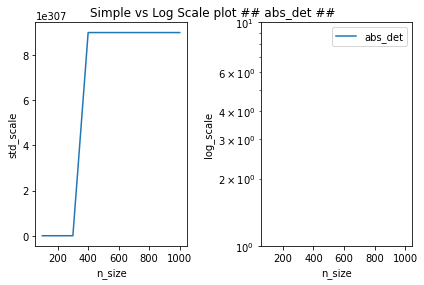

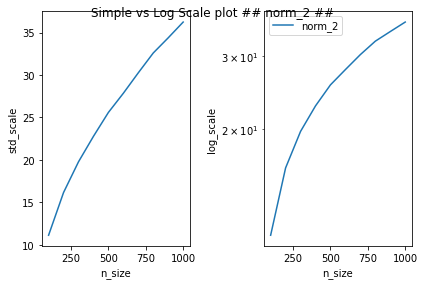

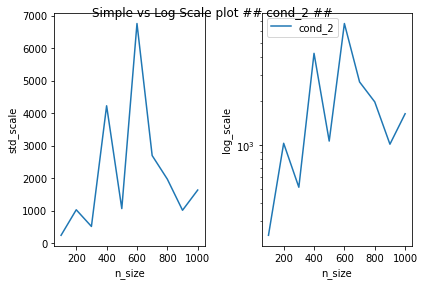

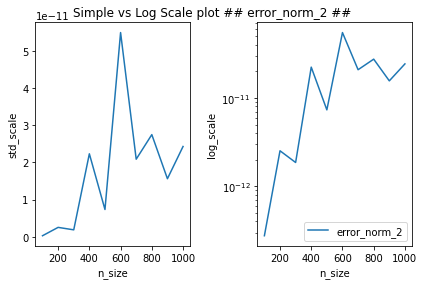

############################## END ##############################

############################## Ploting Time ##############################



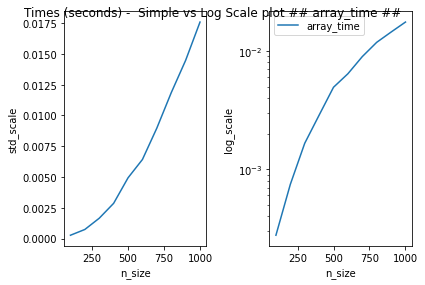

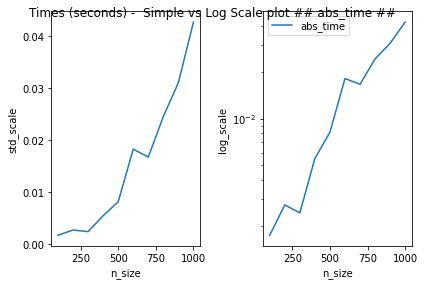

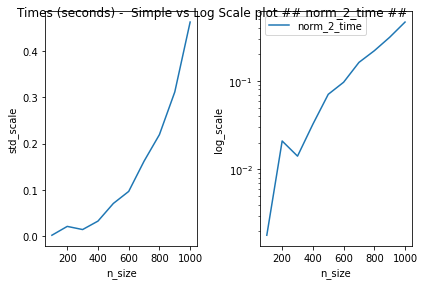

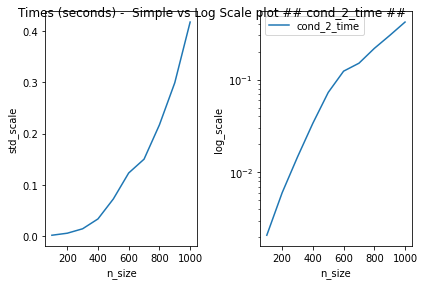

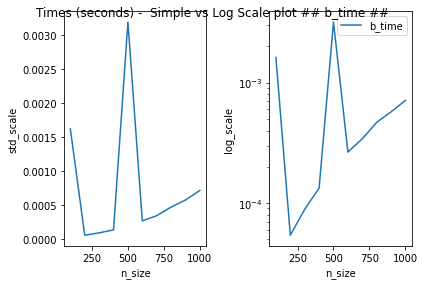

############################## END ##############################



In [7]:
plot_n(results_df)

# Plot time Values
plot_time(results_df)